# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [109]:
#your code here
wnba = pd.read_csv('C:\\Users\\guilh\\M2-mini-project2\\data\\wnba_clean.csv')
wnba.head()

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


**Use describe() to take an initial look at the data.**

In [110]:
#your code here
wnba.describe()

,Unnamed: 0,Height,Weight,BMI,Age,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,143.00000,143.000000,143.000000,142.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,71.00000,184.566434,78.426573,23.091214,27.076923,24.356643,496.972028,73.895105,167.622378,42.901399,14.727273,43.426573,24.803497,39.272727,49.111888,75.578322,21.923077,61.160839,83.083916,44.230769,17.608392,9.713287,32.090909,201.790210,1.132867,0.006993
std,41.42463,8.685068,12.793864,2.073691,3.679170,7.104259,290.777320,56.110895,117.467095,10.111498,17.355919,46.106199,18.512183,36.747747,44.244854,18.712194,21.509276,49.761919,68.302197,41.483017,13.438978,12.520193,21.502017,153.381548,2.900310,0.083624
min,0.00000,165.000000,0.000000,18.390675,21.000000,2.000000,12.000000,1.000000,3.000000,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,35.50000,176.500000,71.000000,21.785876,24.000000,22.000000,240.000000,26.000000,66.000000,36.950000,0.000000,3.000000,0.000000,12.000000,16.500000,71.150000,7.000000,25.500000,34.000000,11.000000,7.000000,2.000000,13.500000,75.000000,0.000000,0.000000
50%,71.00000,185.000000,79.000000,22.873314,27.000000,27.000000,504.000000,69.000000,152.000000,42.000000,10.000000,32.000000,30.300000,29.000000,35.000000,80.000000,13.000000,50.000000,62.000000,33.000000,15.000000,5.000000,28.000000,177.000000,0.000000,0.000000
75%,106.50000,191.000000,86.000000,24.180715,30.000000,29.000000,750.000000,105.000000,244.500000,48.550000,22.000000,65.000000,36.150000,52.500000,66.000000,85.850000,31.000000,84.000000,116.000000,66.500000,27.000000,12.000000,48.000000,277.500000,1.000000,0.000000
max,142.00000,206.000000,113.000000,31.555880,36.000000,32.000000,1018.000000,227.000000,509.000000,100.000000,88.000000,225.000000,100.000000,168.000000,186.000000,100.000000,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [111]:
#your code here
wnba['Age'].max()

36

In [112]:
wnba['Age'].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [113]:
#shows the row where the age have the value 21, the minimum value for age 
wnba.loc[wnba['Age'] == 21]

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
15,15,Angel Robinson,PHO,F/C,198,88,22.446689,US,"August 30, 1995",21,Arizona State,1,15,237,25,44,56.8,1,1,100.0,7,7,100.0,16,42,58,8,1,11,16,58,0,0
23,23,Brionna Jones,CON,F,191,104,28.507990,US,"December 18, 1995",21,Maryland,R,19,112,14,26,53.8,0,0,0.0,16,19,84.2,11,14,25,2,7,1,7,44,0,0


In [114]:
#shows the row where the age have the value 36, the maximum value for age 
wnba.loc[wnba['Age'] == 36]

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
127,127,Sue Bird,SEA,G,175,68,22.204082,US,"October 16, 1980",36,Connecticut,15,27,806,103,244,42.2,50,134,37.3,17,24,70.8,7,46,53,177,31,3,57,273,1,0


In [115]:
#sort the age to check how is the experience according to the age
wnba[wnba.Age >= 30].sort_values(by='Age', ascending=False)


,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
127,127,Sue Bird,SEA,G,175,68,22.204082,US,"October 16, 1980",36,Connecticut,15,27,806,103,244,42.2,50,134,37.3,17,24,70.8,7,46,53,177,31,3,57,273,1,0
1,1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
110,110,Rebekkah Brunson,MIN,F,188,84,23.766410,US,"November 12, 1981",35,Georgetown,14,26,719,97,218,44.5,22,60,36.7,62,83,74.7,46,135,181,40,31,9,42,278,2,0
106,106,Plenette Pierson,MIN,F/C,188,88,24.898144,US,"August 31, 1981",35,Texas Tech,15,29,402,54,142,38.0,17,51,33.3,15,20,75.0,13,49,62,48,12,4,33,140,0,0
67,67,Jia Perkins,MIN,G,173,75,25.059307,US,"February 23, 1982",35,Texas Tech,14,30,932,178,420,42.4,47,123,38.2,114,134,85.1,24,72,96,103,41,11,83,517,0,0
45,45,Diana Taurasi,PHO,G,183,74,22.096808,US,"November 6, 1982",34,Connecticut,13,20,591,121,255,47.5,22,66,33.3,112,118,94.9,31,98,129,32,20,31,28,376,3,0
95,95,Monique Currie,PHO,G/F,183,80,23.888441,US,"February 25, 1983",34,Duke,11,32,717,121,284,42.6,37,93,39.8,85,103,82.5,19,103,122,67,22,11,48,364,0,0
52,52,Érika de Souza,SAN,C,196,86,22.386506,BR,"September 3, 1982",34,Brazil,13,30,579,65,112,58.0,0,0,0.0,29,32,90.6,58,74,132,35,18,7,37,159,0,0
88,88,Lindsay Whalen,MIN,G,175,78,25.469388,US,"September 5, 1982",34,Minnesota,14,22,520,69,153,45.1,12,34,35.3,27,36,75.0,8,46,54,90,11,2,44,177,0,0
30,30,Cappie Pondexter,CHI,G,175,73,23.836735,US,"July 1, 1983",34,Rutgers,11,24,676,94,258,36.4,8,32,25.0,54,67,80.6,10,59,69,104,17,5,56,250,2,0


In [116]:
# i'm creating a sub dataframe to plot the column experience and age to see if the distribution makes sense
wnba_sub_df = wnba[wnba.Age >= 30].sort_values(by='Age', ascending=False)
#slices the subdataframe so we have a dataframe with only the columns age and experience
wnba_sub2_df=wnba_sub_df[['Age','Experience']]



In [117]:
#because the experience column have some non numeric values (R) i had to convert to numeric to do other operations!!
wnba_sub2_df['Experience'] =pd.to_numeric(wnba_sub2_df['Experience'], errors ='coerce').fillna(0).astype('int')


<ipython-input-117-cdf9cc93ab51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wnba_sub2_df['Experience'] =pd.to_numeric(wnba_sub2_df['Experience'], errors ='coerce').fillna(0).astype('int')


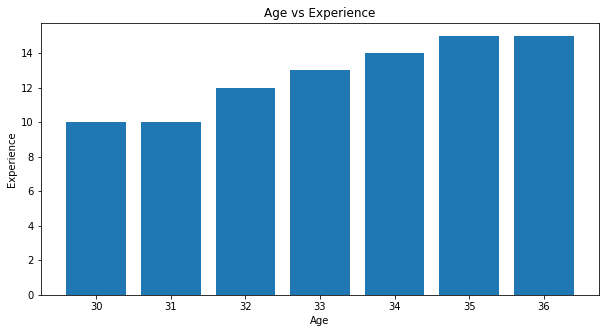

In [118]:
# importing library
import matplotlib.pyplot as plt
  
x = wnba_sub2_df['Age']
y = wnba_sub2_df['Experience']

# setting figure size by using figure() function 
plt.figure(figsize = (10, 5))        
        
# making the bar chart on the data
plt.bar(x, y)

# giving title to the plot
plt.title("Age vs Experience")
      
# giving X and Y labels
plt.xlabel("Age")
plt.ylabel("Experience")
      
# visualizing the plot
plt.show()

#according to the plot it seems that the maximum age is just an outlier and not an error in the data!1

In [119]:
wnba['Weight'].describe()

count    143.000000
mean      78.426573
std       12.793864
min        0.000000
25%       71.000000
50%       79.000000
75%       86.000000
max      113.000000
Name: Weight, dtype: float64

In [120]:
#shows the row where the wweight have the value zero, the minimum value for the weight which is not possible!!!
wnba.loc[wnba['Weight'] == 0]

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
91,91,Makayla Epps,CHI,G,178,0,NaN,US,"June 6, 1995",22,Kentucky,R,14,52,2,14,14.3,0,5,0.0,2,5,40.0,2,0,2,4,1,0,4,6,0,0


In [121]:
#shows the row where the weight have the value 113, the maximum value for the weight which seems to be accurate!!!
wnba.loc[wnba['Weight'] == 113]

,Unnamed: 0,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
12,12,Amanda Zahui B.,NY,C,196,113,29.414827,SE,"August 9, 1993",24,Minnesota,3,25,133,20,53,37.7,2,8,25.0,9,12,75.0,5,18,23,7,4,5,12,51,0,0
36,36,Courtney Paris,DAL,C,193,113,30.336385,US,"September 21, 1987",29,Oklahoma,7,16,217,32,57,56.1,0,0,0.0,6,12,50.0,28,34,62,5,6,8,18,70,0,0


### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

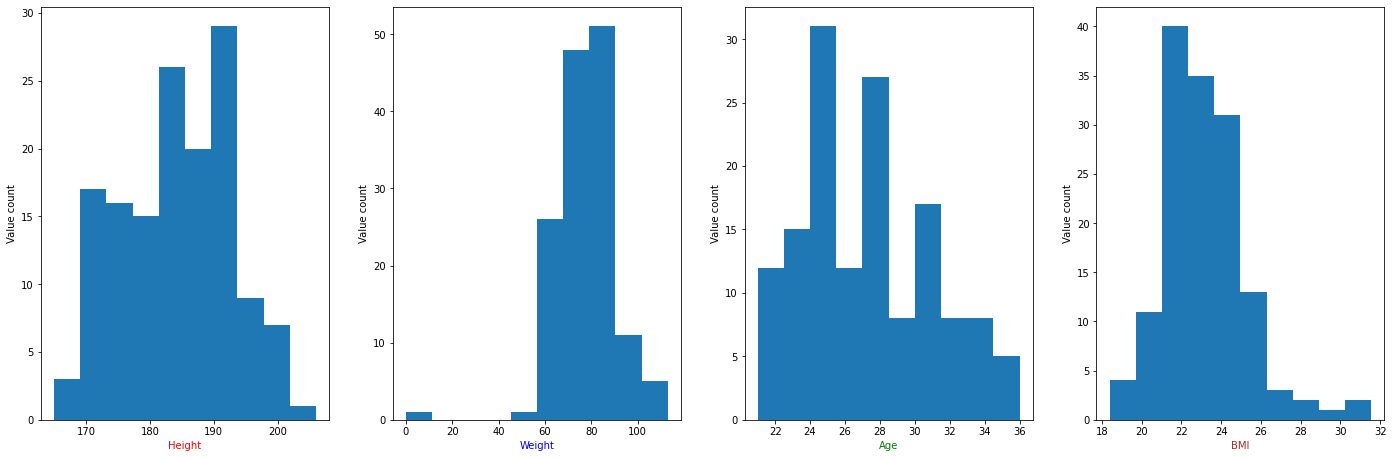

In [150]:
#your code here
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4,figsize=((20,7)))

ax1.hist(wnba['Height'])
ax2.hist(wnba['Weight'])
ax3.hist(wnba['Age'])
ax4.hist(wnba['BMI'])

ax1.set_xlabel('Height',color='red')
ax2.set_xlabel('Weight',color='blue')
ax3.set_xlabel('Age',color='green')
ax4.set_xlabel('BMI',color='brown')

ax1.set_ylabel('Value count')
ax2.set_ylabel('Value count')
ax3.set_ylabel('Value count')
ax4.set_ylabel('Value count')

#set the spacing between subplots
fig.tight_layout(pad=3.0)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='BMI', ylabel='Density'>

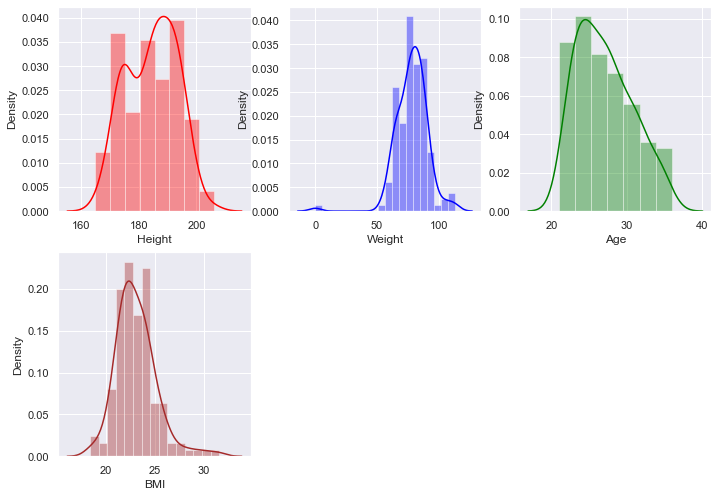

In [193]:
#sets the figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Height dist plot
plt.subplot(231)

sns.distplot(wnba.Height,color="red")

#Weight dist plot
plt.subplot(232)

sns.distplot(wnba.Weight,color="blue")

#Age dist plot
plt.subplot(233)

sns.distplot(wnba.Age,color="green")

#BMI dist plot
plt.subplot(234)

sns.distplot(wnba.BMI,color="brown")


**What conclusions do you think we can take from this plots?**

In [6]:
#your conclusions here
"""
-height distribution looks like a bimodal

-weight distribution is a bit skewed to the left

-age distribution is a bit skewed to the right

-bmi is close to a normal distribution
"""


In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

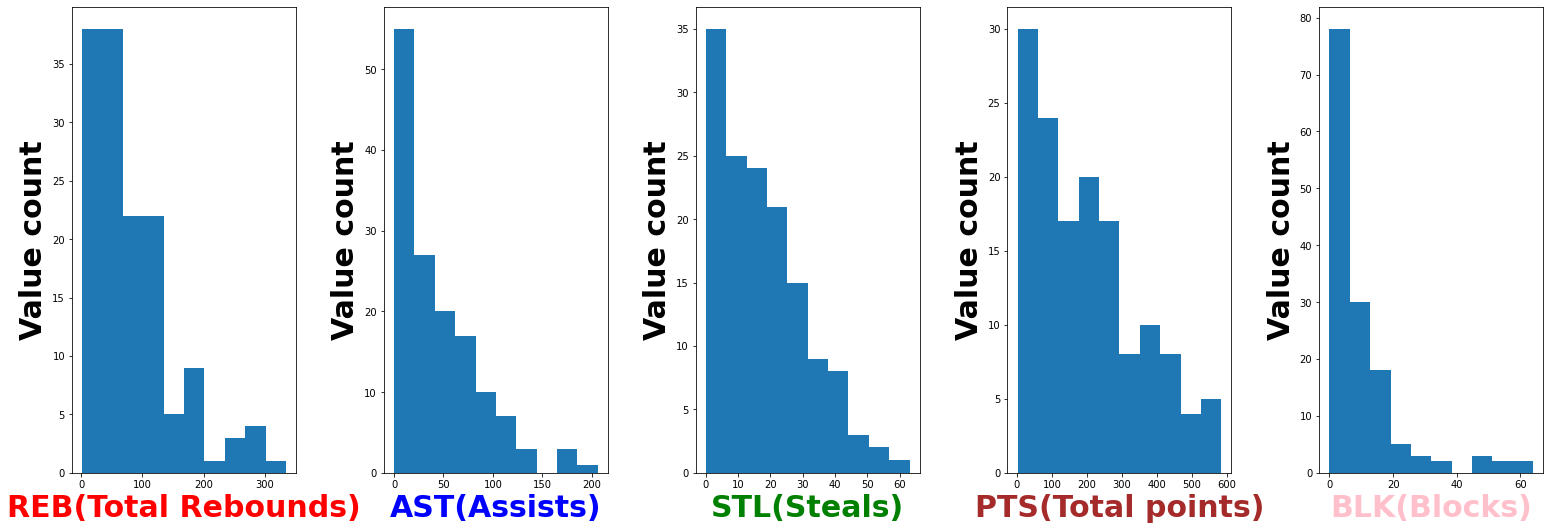

In [167]:
#your code here
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1,ncols=5,figsize=((22,8)))

ax1.hist(wnba['REB'])
ax2.hist(wnba['AST'])
ax3.hist(wnba['STL'])
ax4.hist(wnba['PTS'])
ax5.hist(wnba['BLK'])

ax1.set_xlabel('REB(Total Rebounds)',color='red',fontsize=(30),fontweight='bold')
ax2.set_xlabel('AST(Assists)',color='blue',fontsize=(30),fontweight='bold')
ax3.set_xlabel('STL(Steals)',color='green',fontsize=(30),fontweight='bold')
ax4.set_xlabel('PTS(Total points)',color='brown',fontsize=(30),fontweight='bold')
ax5.set_xlabel('BLK(Blocks)',color='pink',fontsize=(30),fontweight='bold')

ax1.set_ylabel('Value count',fontsize=(30),fontweight='bold')
ax2.set_ylabel('Value count',fontsize=(30),fontweight='bold')
ax3.set_ylabel('Value count',fontsize=(30),fontweight='bold')
ax4.set_ylabel('Value count',fontsize=(30),fontweight='bold')
ax5.set_ylabel('Value count',fontsize=(30),fontweight='bold')

#set the spacing between subplots
fig.tight_layout(pad=3.0)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='BLK', ylabel='Density'>

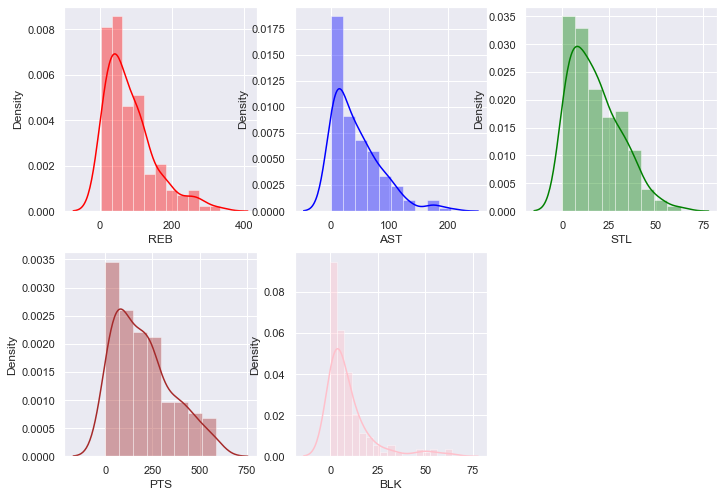

In [194]:
#sets the figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#REB dist plot
plt.subplot(231)

sns.distplot(wnba.REB,color="red")

#AST dist plot
plt.subplot(232)

sns.distplot(wnba.AST,color="blue")

#STL dist plot
plt.subplot(233)

sns.distplot(wnba.STL,color="green")

#PTS dist plot
plt.subplot(234)

sns.distplot(wnba.PTS,color="brown")

#BLK dist plot
plt.subplot(235)

sns.distplot(wnba.BLK,color="pink")

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here

#the distributions are skewed to the right


As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

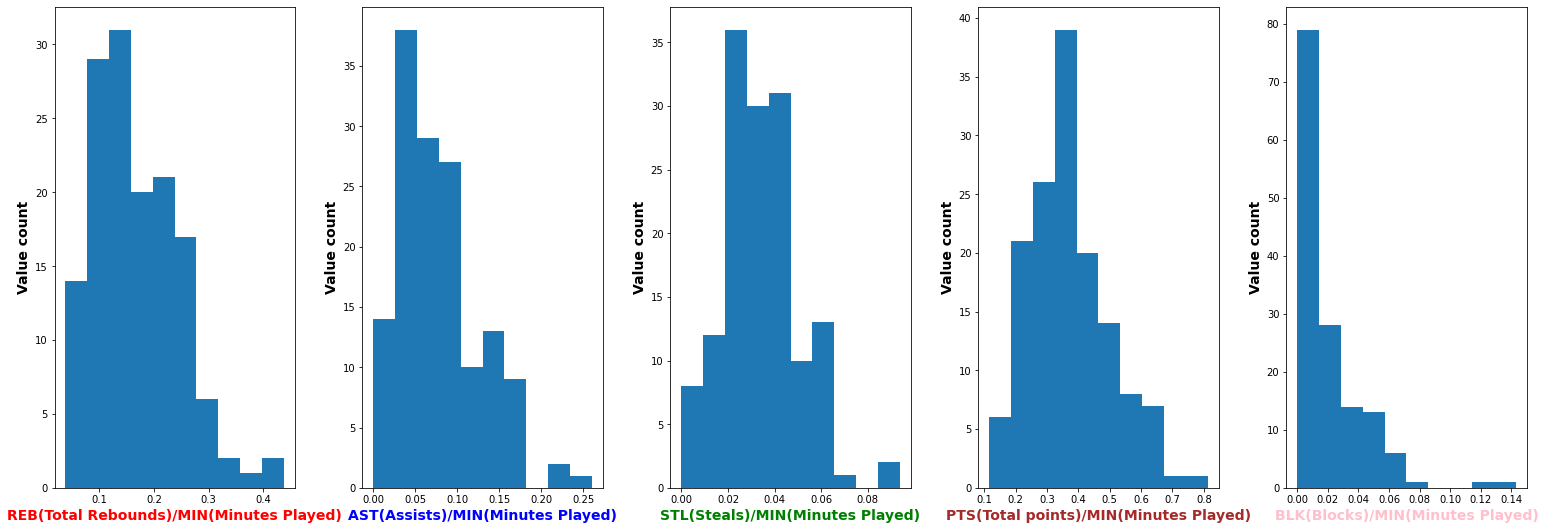

In [175]:
#your code here
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1,ncols=5,figsize=((22,8)))

ax1.hist(wnba['REB']/wnba['MIN'])
ax2.hist(wnba['AST']/wnba['MIN'])
ax3.hist(wnba['STL']/wnba['MIN'])
ax4.hist(wnba['PTS']/wnba['MIN'])
ax5.hist(wnba['BLK']/wnba['MIN'])

ax1.set_xlabel('REB(Total Rebounds)/MIN(Minutes Played)',color='red',fontsize=(14),fontweight='bold')
ax2.set_xlabel('AST(Assists)/MIN(Minutes Played)',color='blue',fontsize=(14),fontweight='bold')
ax3.set_xlabel('STL(Steals)/MIN(Minutes Played)',color='green',fontsize=(14),fontweight='bold')
ax4.set_xlabel('PTS(Total points)/MIN(Minutes Played)',color='brown',fontsize=(14),fontweight='bold')
ax5.set_xlabel('BLK(Blocks)/MIN(Minutes Played)',color='pink',fontsize=(14),fontweight='bold')

ax1.set_ylabel('Value count',fontsize=(14),fontweight='bold')
ax2.set_ylabel('Value count',fontsize=(14),fontweight='bold')
ax3.set_ylabel('Value count',fontsize=(14),fontweight='bold')
ax4.set_ylabel('Value count',fontsize=(14),fontweight='bold')
ax5.set_ylabel('Value count',fontsize=(14),fontweight='bold')

#set the spacing between subplots
fig.tight_layout(pad=3.0)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:ylabel='Density'>

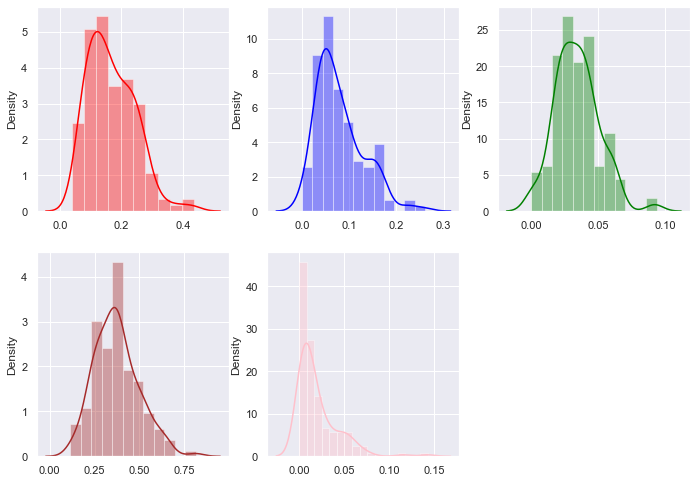

In [197]:
#REB/MIN dist plot
plt.subplot(231)

sns.distplot(wnba.REB/wnba.MIN,color="red")

#AST/MIN dist plot
plt.subplot(232)

sns.distplot(wnba.AST/wnba.MIN,color="blue")

#STL/MIN dist plot
plt.subplot(233)

sns.distplot(wnba.STL/wnba.MIN,color="green")

#PTS/MIN dist plot
plt.subplot(234)

sns.distplot(wnba.PTS/wnba.MIN,color="brown")

#BLK/MIN dist plot
plt.subplot(235)

sns.distplot(wnba.BLK/wnba.MIN,color="pink")


**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
"""The distribution is less skewed after dividing those stats by the minutes played for each player in the dataset,
with an exception for the blocks divided by the minutes played. In general the distributions follow a more or 
less normal distribution with one exception like it was said before.
"""

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

 your comments here
## 1.Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.

$\color{red}{\text{Answer: in average she couldn't}}$

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FTA', ylabel='Density'>

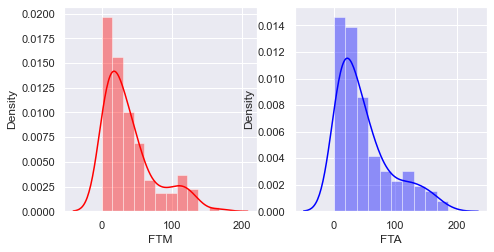

In [203]:
#Free Throws made
plt.subplot(231)
sns.distplot(wnba.FTM,color="red")

#Free Throws Attempts
plt.subplot(232)
sns.distplot(wnba.FTA,color="blue")

# 2.Your sister says that most female professional players fail their free throws

$\color{red}{\text{Answer: In average there are more players failing their free throws but we don't have male players to compare!!! }}$

In [204]:
wnba['AST'].describe()

count    143.000000
mean      44.230769
std       41.483017
min        0.000000
25%       11.000000
50%       33.000000
75%       66.500000
max      206.000000
Name: AST, dtype: float64

# 3.Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

$\color{red}{\text{Answer: the answer is that the average would be lower(arround 44) }}$